In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r'C:\Users\genus\OneDrive\Documents\flights\Electric_Production.csv')

In [3]:
data.columns=['date','consumption']

In [4]:
data=data.set_index('date')

<Figure size 360000x36000 with 0 Axes>

<AxesSubplot:xlabel='date'>

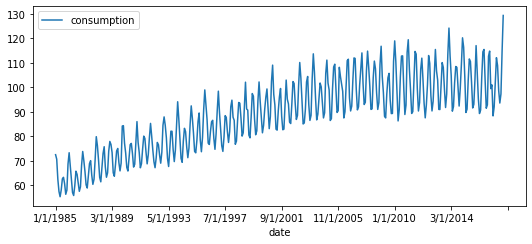

In [5]:
import matplotlib.pyplot as plt
# change the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig=plt.figure(figsize=(5000,500))
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

data.plot()

In [6]:
import statsmodels as sts
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data['consumption'],  model='multiplicable',period=30)

In [7]:
#In seasonal_decompose we have to set the model. We can either set the model to be Additive or Multiplicative. A rule of thumb for selecting the right model is to see in our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model. Otherwise, if the trend and seasonal variation increase or decrease over time then we use the Multiplicative model.

In [8]:
import matplotlib.pyplot as plt
# change the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig=plt.figure(figsize=(1000,1000)))
spacing = 0.5
fig.subplots_adjust(bottom=spacing)
plt.show()

data.plot()
result.trend.plot()

SyntaxError: unmatched ')' (Temp/ipykernel_2124/204751901.py, line 5)

<AxesSubplot:xlabel='date'>

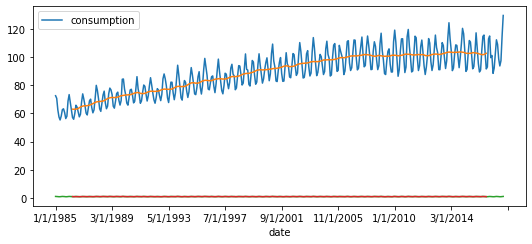

In [ ]:
data.plot()
result.trend.plot()
result.seasonal.plot()
result.resid.plot()

<AxesSubplot:xlabel='date'>

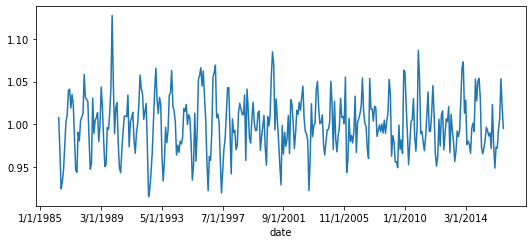

In [11]:
result.resid.plot()

In [12]:
#check for stationarity of data

In [13]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
#print 'Results of Dickey-Fuller Test:'
dftest = adfuller(data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
dtype: float64
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
dtype: float64
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [14]:
diffdata=data-data.shift(1)
diffdata=diffdata.fillna(0)

In [15]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
#print 'Results of Dickey-Fuller Test:'
dftest = adfuller(diffdata, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Test Statistic                -7.085381e+00
p-value                        4.552829e-10
#Lags Used                     1.400000e+01
Number of Observations Used    3.820000e+02
Critical Value (1%)           -3.447585e+00
dtype: float64
Test Statistic                -7.085381e+00
p-value                        4.552829e-10
#Lags Used                     1.400000e+01
Number of Observations Used    3.820000e+02
Critical Value (1%)           -3.447585e+00
Critical Value (5%)           -2.869136e+00
dtype: float64
Test Statistic                -7.085381e+00
p-value                        4.552829e-10
#Lags Used                     1.400000e+01
Number of Observations Used    3.820000e+02
Critical Value (1%)           -3.447585e+00
Critical Value (5%)           -2.869136e+00
Critical Value (10%)          -2.570816e+00
dtype: float64


In [16]:
#The differenced time series data is stationery

In [17]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [18]:
lag_acf = acf(diffdata, nlags=20)
lag_pacf = pacf(diffdata, nlags=20, method='ols')

c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


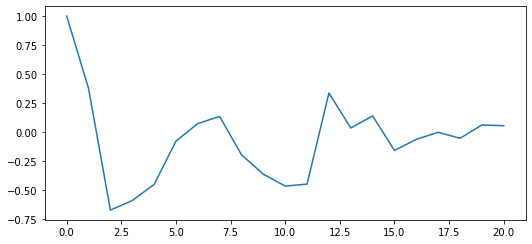

In [19]:
plt.plot(lag_pacf)

(0.0, 10.0)

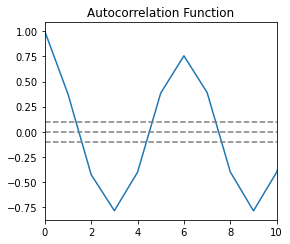

In [20]:
#Plot ACF: 
import numpy as np
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diffdata)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diffdata)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlim(0,10)

(0.0, 10.0)

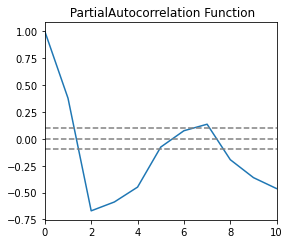

In [21]:
import numpy as np
plt.subplot(121) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diffdata)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diffdata)),linestyle='--',color='gray')
plt.title(' PartialAutocorrelation Function')
plt.xlim(0,10)

c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was

TypeError: unsupported operand type(s) for +: 'int' and 'str'

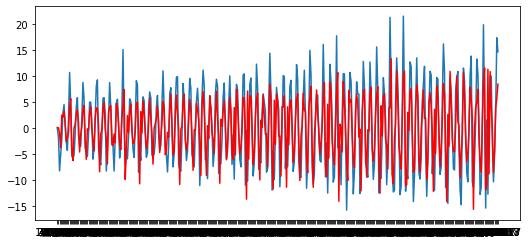

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diffdata, order=(2, 0, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(diffdata)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-diffdata)**2))

c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


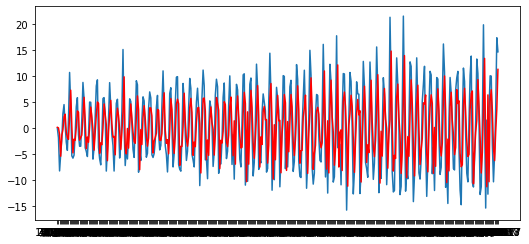

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diffdata, order=(0, 0, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(diffdata)
plt.plot(results_AR.fittedvalues, color='red')


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
for p in range(0,3):
    for q in range(0,3):
        model=SARIMAX(data,order=(p,1,q))
        result=model.fit()
        print(p,1,q)
        print(result.aic)
        print(result.aic)

c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfi

0 1 0
2748.185439005834
2748.185439005834
0 1 1
2622.5500825217123
2622.5500825217123
0 1 2


c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfi

2537.9804361647566
2537.9804361647566
1 1 0
2689.8382846734485
2689.8382846734485
1 1 1
2623.5891418612337
2623.5891418612337


c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1 1 2
2504.0749876830596
2504.0749876830596
2 1 0
2461.6814793382346
2461.6814793382346


c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2 1 1
2250.0696679157963
2250.0696679157963


c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2 1 2
2102.796084520709
2102.796084520709


In [31]:
#Choose 2,1,2 model as it has the lowest AIC and BIC
model=SARIMAX(data,order=(2,1,2))
resultmodel=model.fit()

c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [32]:
np.mean(abs(resultmodel.resid))

2.781997504701816

In [23]:
data.mean()

consumption    88.847218
dtype: float64

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
resultmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            consumption   No. Observations:                  397
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1046.398
Date:                Wed, 22 Jun 2022   AIC                           2102.796
Time:                        16:59:20   BIC                           2122.703
Sample:                    01-01-1985   HQIC                          2110.683
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.002    546.453      0.000       0.996       1.003
ar.L2         -0.9994      0.001   -896.414      0.000      -1.002      -0.997
ma.L1         -1.0430      0.017    -61.335      0.000      -1.076      -1.010
ma.L2          0.9745      0.018     55.493      0.000       0.940       1.009
sigma2        11.2953      0.638     17.714      0.000      10.046      12.545
===================================================================================
Ljung-Box (L1) (Q):                   7.72   Jarque-Bera (JB):                25.76
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# we see that the the two critical model diagnostics that prob(q) that the residuals are uncorrelated is failing and also the Ljungbox test hypothesis that residuals are normally distributed is also failing. Hence ths (2,1,2) model is not suitable

In [34]:
# we will try other values of p d q
model=SARIMAX(data,order=(1,1,1))
resultmodel=model.fit()

c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\genus\OneDrive\Documents\testfiles\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [35]:
resultmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            consumption   No. Observations:                  397
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1308.795
Date:                Wed, 22 Jun 2022   AIC                           2623.589
Time:                        16:59:53   BIC                           2635.533
Sample:                    01-01-1985   HQIC                          2628.321
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.091      0.805      0.421      -0.105       0.251
ma.L1          0.5450      0.070      7.737      0.000       0.407       0.683
sigma2        43.4248      3.296     13.175      0.000      36.965      49.885
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.72   Prob(JB):                         0.49
Heteroskedasticity (H):               2.97   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Now both the hypothesis are satisified . We will use this model for the final forecast

In [47]:
resultmodel.predict(start=len(data),end=len(data)+6)

2018-02-01    133.477101
2018-03-01    133.775154
2018-04-01    133.796969
2018-05-01    133.798565
2018-06-01    133.798682
2018-07-01    133.798691
2018-08-01    133.798691
Freq: MS, Name: predicted_mean, dtype: float64